SSH model with (a_n, b_n) cells with intracell couplings v and intercell couplings w

\begin{equation}
\hat{H}=v \sum_{n=1}^N({\hat{a}_{n}}^{\dagger} \hat{b}_{n} +h.c.)+w\sum_{n=1}^{N-1}({\hat{b}_{n}}^{\dagger} \hat{a}_{n+1} + h.c.)
\end{equation}

$\hat a_n$ operators will indexed by $2n$, while $\hat b_n$ will go by 2n+1 in the code below

In [1]:
from math import pi
import numpy as np
from qutip import steadystate, expect, Qobj
import matplotlib.pyplot as plt

import sys
import os
 
sys.path.append(os.path.dirname(os.getcwd()))

from main import QSystem

In [14]:
N = 20  # 20 cells, 40 sites

v = .1
w = 1

In [15]:
single_photon_states = [[1 if j == i else 0 for j in range(2*N)] for i in range(2*N)]  # 2N site-localized basis states

couplings = [[2*n, 2*n+1, v] for n in range(N)] + [[2*n+1, 2*n+2, w] for n in range(N-1)]

In [16]:
system = QSystem(list(zip(range(39), []*40)), couplings, single_photon_states)  # initialization of the system

In [17]:
H = system.H_matrix()

In [18]:
evals, evecs = H.eigenstates()

In [19]:
evals

array([-1.09889025e+00, -1.09558108e+00, -1.09013269e+00, -1.08264532e+00,
       -1.07325918e+00, -1.06215408e+00, -1.04954893e+00, -1.03570072e+00,
       -1.02090295e+00, -1.00548306e+00, -9.89798713e-01, -9.74232377e-01,
       -9.59183882e-01, -9.45060635e-01, -9.32265283e-01, -9.21180979e-01,
       -9.12154818e-01, -9.05480543e-01, -9.01382109e-01, -1.97297691e-16,
        2.26013532e-16,  9.01382109e-01,  9.05480543e-01,  9.12154818e-01,
        9.21180979e-01,  9.32265283e-01,  9.45060635e-01,  9.59183882e-01,
        9.74232377e-01,  9.89798713e-01,  1.00548306e+00,  1.02090295e+00,
        1.03570072e+00,  1.04954893e+00,  1.06215408e+00,  1.07325918e+00,
        1.08264532e+00,  1.09013269e+00,  1.09558108e+00,  1.09889025e+00])

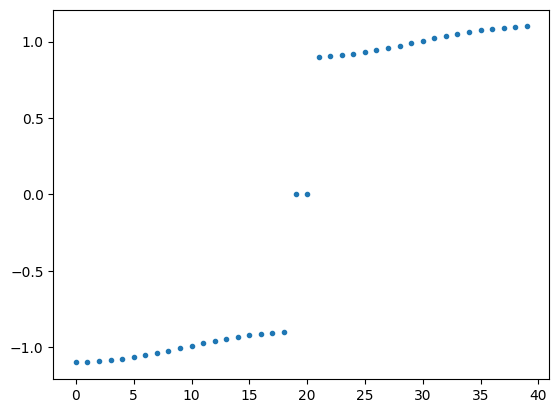

In [20]:
plt.plot(evals, ".")